In [2]:
import pandas
titanic=pandas.read_csv("train.csv")
titanic
titanic.head()
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
print(titanic["Sex"].unique())
titanic.loc[titanic["Sex"]=="male","Sex"]=0
titanic.loc[titanic["Sex"]=="female","Sex"]=1

['male' 'female']


In [5]:
print(titanic["Embarked"].unique())
titanic["Embarked"]=titanic["Embarked"].fillna("S")
titanic.loc[titanic["Embarked"]=="S","Embarked"]=0
titanic.loc[titanic["Embarked"]=="C","Embarked"]=1
titanic.loc[titanic["Embarked"]=="Q","Embarked"]=2

['S' 'C' 'Q' nan]


In [6]:
print(titanic["Embarked"].describe())

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

predictors = ["Pclass" , "Sex" , "Age" , "SibSp" ,"Parch" , "Fare" ,"Embarked"]
alg=LinearRegression()
kf=KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions=[]
for train,test in kf:
    train_predictors=(titanic[predictors].iloc[train,:])
    train_targets=titanic["Survived"].iloc[train]
    alg.fit(train_predictors,train_targets)
    test_predictions=alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
    
    

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
import numpy as np
predictions=np.concatenate(predictions,axis=0)
predictions[predictions>0.5]=1
predictions[predictions<=0.5]=0
accuracy=sum(predictions[predictions==titanic["Survived"]])/len(predictions)
print (accuracy)

0.261503928171


In [9]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
alg=LogisticRegression(random_state=1)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=3)
print (scores.mean())

0.787878787879


In [10]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass" , "Sex" , "Age" , "SibSp" ,"Parch" , "Fare" ,"Embarked"]
alg=RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2,min_samples_leaf=1)
kf=cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)
print (scores.mean())


0.785634118967


In [11]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass" , "Sex" , "Age" , "SibSp" ,"Parch" , "Fare" ,"Embarked"]
alg=RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2,min_samples_leaf=1)
kf=cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)
print (scores.mean())

0.785634118967


In [12]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass" , "Sex" , "Age" , "SibSp" ,"Parch" , "Fare" ,"Embarked"]
alg=RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4,min_samples_leaf=2)
kf=cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)
print (scores.mean())


0.81593714927


In [13]:
titanic["Familysizes"]=titanic["SibSp"]+titanic["Parch"]
titanic["NameLength"]=titanic["Name"].apply(lambda x: len(x))
import re

def get_title(name):
    title_search=re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""
titles=titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

title_mapping={"Mr" : 1, "Miss" : 2, "Mrs":3,"Master":4,"Dr":5,"Rev":6,"Mlle":7,"Major":8,\
              "Col":9,"Sir":10,"Jonkheer":11,"Countess":12,"Capt":13,"Ms":14,"Mme":15,"Lady"\
               :16,"Don":17}
for k,v in title_mapping.items():
    titles[titles==k]=v

print(pandas.value_counts(titles))
titanic["Title"]=titles



Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Capt          1
Lady          1
Mme           1
Don           1
Countess      1
Ms            1
Sir           1
Name: Name, dtype: int64
1     517
2     182
3     125
4      40
5       7
6       6
8       2
7       2
9       2
16      1
10      1
11      1
12      1
13      1
14      1
15      1
17      1
Name: Name, dtype: int64


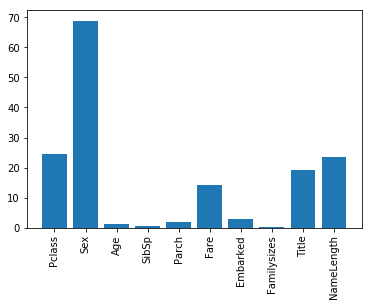

0.812570145903


In [14]:
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass" , "Sex" , "Age" , "SibSp" ,"Parch" , "Fare" ,"Embarked","Familysizes","Title","NameLength"]
selector=SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic["Survived"])
scores=-np.log10(selector.pvalues_)
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation="vertical")
plt.show()

predictors=["Pclass" , "Sex" , "Fare" ,"Title"]
alg=RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4,min_samples_leaf=2)
kf=cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)
print (scores.mean())

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
algorithms=[[GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3),\
            ["Pclass" , "Sex" , "Fare" ,"Title"]],[LogisticRegression(random_state=1),\
            ["Pclass" , "Sex"  ,"Parch" , "Familysizes" ,"Title","Age","Embarked"]]]
kf=KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions=[]
for train,test in kf:
    train_target=titanic["Survived"].iloc[train]
    full_test_predictions=[]
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:],train_target)
        test_predictions=alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions=(full_test_predictions[0]+full_test_predictions[1])/2
    test_predictions[test_predictions<=0.5]=0
    test_predictions[test_predictions>0.5]=1
    predictions.append(test_predictions)
predictions=np.concatenate(predictions,axis=0)    
accuracy=sum(predictions[predictions==titanic["Survived"]])/len(predictions)
print (accuracy)

0.271604938272
